In [1]:
#models = ['GIN', 'GAT', 'GCNN', 'GatedGCNN']
# note, no twitter.
#TUdataset_names = ["RANDOM",'ENZYMES', 'PROTEINS', 'IMDB-BINARY', 'MUTAG', 'COLLAB']
run_folders = ['230924_hparam2',
 '230924_hparam',
 '230924_hparam_TU_multiarch',
 '230924_hparam_TU']
relevant_keys = [ 'model_type', 'num_layers',
       'repeat_lift_layers', 'num_layers_project', 'rank', 'vc_penalty', 
       'dataset', 'infinite',  'positional_encoding', 'pe_dimension',
       'max_valid_score', 'max_valid_epoch',
       'scores']

In [2]:
import json
import pandas as pd
import numpy as np
import os

folder_path = '/home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs'
model_list = [os.path.join(folder_path, run_folder, x) for run_folder in run_folders for x in os.listdir(os.path.join(folder_path, run_folder))  ]


rows = []

errored = []
for model_folder in model_list:
    try:
        with open(os.path.join(model_folder, 'params.txt'), 'r') as f:
            model_args = json.load(f)
        
        losses = np.load(os.path.join(model_folder, 'valid_scores.npy'))
        test_losses = np.load(os.path.join(model_folder, 'test_scores.npy'))
        modeldict = model_args #{x: model_args[x] for x in params}
        #modeldict['max_valid_score'] = max(losses)
        #modeldict['max_valid_epoch'] = np.argmax(losses)
        modeldict['scores'] = test_losses[np.argmax(losses)]
        modeldict['baseline'] = False
        modeldict['full_scores'] = losses
        modeldict['valid_scores'] = losses
        modeldict['test_scores'] = test_losses

        rows.append(modeldict)
        
    except:
        print(f'something is wrong w/ {model_folder}')
        errored.append(model_folder)

something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/LiftMP_runs/paramhash:d7295454a183410793f153014e74c48fb81051635748e2fa4358e5e62ff747c8
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/LiftMP_runs/paramhash:959f4a30685c103490271cfaa513d24bffe58e4ff7f56301797ac56a2ab76978
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/LiftMP_runs/paramhash:af7aa021f2876f5b35b4888f53a3bc63a8846a1ae09ca8bd2d6f8c1ee2f9923a
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/LiftMP_runs/paramhash:e50ba9e1678781fa6302c1c2e627dc630da420c987ab9c613ab6878be6bb9af3
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/LiftMP_runs/paramhash:55bb40501c2d33a9f61b4f08f82ad78379330f60679339affb7ac8405e3dbd0a
something is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/LiftMP_runs/paramhash:ac400b21989cc7b2bcbb8be98668cb4e2807c536a5eb86be327466214f4df1c5
something is wrong w/ /home/bcjexu

In [3]:
#rows.append({'TUdataset_name': 'Dummy',
#             'scores': 0})

In [32]:
df = pd.DataFrame.from_records(rows)

In [33]:
df = df.fillna("None")

In [34]:
df.sort_values('scores', ascending = False)

,problem_type,seed,prefix,model_type,num_layers,repeat_lift_layers,num_layers_project,rank,dropout,hidden_channels,...,positional_encoding,pe_dimension,split_seed,log_dir,device,scores,baseline,full_scores,valid_scores,test_scores
307,vertex_cover,0,230924_hparam_TU_multiarch,GAT,16,None,4,8,0.0,32,...,laplacian_eigenvector,4,0,training_runs/230924_hparam_TU_multiarch/param...,cuda,-7.736842,False,"[-11.157894736842104, -9.263157894736842, -8.9...","[-11.157894736842104, -9.263157894736842, -8.9...","[-9.052631578947368, -8.0, -8.0, -7.7894736842..."
334,vertex_cover,0,230924_hparam_TU_multiarch,GatedGCNN,16,None,4,2,0.0,32,...,laplacian_eigenvector,1,0,training_runs/230924_hparam_TU_multiarch/param...,cuda,-7.736842,False,"[-8.789473684210526, -8.947368421052632, -8.73...","[-8.789473684210526, -8.947368421052632, -8.73...","[-7.7894736842105265, -7.7894736842105265, -7...."
399,vertex_cover,0,230924_hparam_TU,LiftMP,8,None,4,16,0.0,32,...,laplacian_eigenvector,8,0,training_runs/230924_hparam_TU/paramhash:c3e69...,cuda,-7.736842,False,"[-8.789473684210526, -8.736842105263158, -8.73...","[-8.789473684210526, -8.736842105263158, -8.73...","[-7.7368421052631575, -7.7368421052631575, -7...."
214,vertex_cover,0,230924_hparam_TU_multiarch,GAT,16,None,4,2,0.0,32,...,laplacian_eigenvector,1,0,training_runs/230924_hparam_TU_multiarch/param...,cuda,-7.736842,False,"[-10.0, -8.789473684210526, -8.789473684210526...","[-10.0, -8.789473684210526, -8.789473684210526...","[-9.0, -7.7894736842105265, -8.157894736842104..."
236,vertex_cover,0,230924_hparam_TU_multiarch,GAT,16,None,4,16,0.0,32,...,laplacian_eigenvector,8,0,training_runs/230924_hparam_TU_multiarch/param...,cuda,-7.736842,False,"[-9.947368421052632, -9.263157894736842, -8.84...","[-9.947368421052632, -9.263157894736842, -8.84...","[-8.894736842105264, -8.31578947368421, -8.052..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,vertex_cover,0,230924_hparam2,LiftMP,2,None,4,1,0.0,32,...,None,8,0,training_runs/230924_hparam2/paramhash:a74a55e...,cuda,-100.000000,False,"[-100.0, -100.0, -100.0, -100.0, -100.0, -100....","[-100.0, -100.0, -100.0, -100.0, -100.0, -100....","[-100.0, -100.0, -100.0, -100.0, -100.0, -100...."
18,vertex_cover,0,230924_hparam2,LiftMP,16,None,4,1,0.0,32,...,None,8,0,training_runs/230924_hparam2/paramhash:439f103...,cuda,-100.000000,False,"[-100.0, -100.0, -100.0, -100.0, -100.0, -100....","[-100.0, -100.0, -100.0, -100.0, -100.0, -100....","[-100.0, -100.0, -100.0, -100.0, -100.0, -100...."
25,vertex_cover,0,230924_hparam2,LiftMP,16,None,4,1,0.0,32,...,None,8,0,training_runs/230924_hparam2/paramhash:a1c397c...,cuda,-100.000000,False,"[-100.0, -100.0, -100.0, -100.0, -100.0, -100....","[-100.0, -100.0, -100.0, -100.0, -100.0, -100....","[-100.0, -100.0, -100.0, -100.0, -100.0, -100...."
30,vertex_cover,0,230924_hparam2,LiftMP,16,None,4,1,0.0,32,...,None,8,0,training_runs/230924_hparam2/paramhash:026ab11...,cuda,-100.000000,False,"[-100.0, -100.0, -100.0, -100.0, -100.0, -100....","[-100.0, -100.0, -100.0, -100.0, -100.0, -100....","[-100.0, -100.0, -100.0, -100.0, -100.0, -100...."


In [35]:
df.full_scores[1]

array([-97.476, -97.569, -97.539, -97.672, -97.663, -97.784, -97.711,
       -97.568, -97.62 , -97.671])

In [25]:
#df = df[df.dataset == 'ErdosRenyi']

Text(0.5, 0, '1000-step increments')

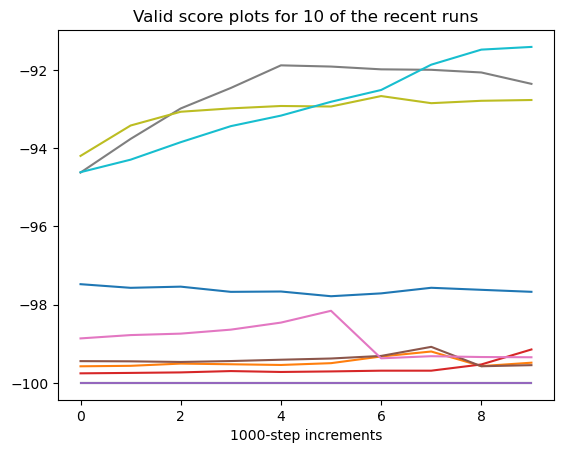

In [61]:
import matplotlib.pyplot as plt

for i, row in df[df.dataset == 'ErdosRenyi'].head(10).iterrows():
    plt.plot(row.full_scores)

plt.title("Valid score plots for 10 of the recent runs")
plt.xlabel("1000-step increments")
#plt.ylim(0, 300)

In [60]:
bestdf = df.loc[df.groupby('dataset')['scores'].idxmax()]#[relevant_keys]

In [63]:
bestdf

,problem_type,seed,prefix,model_type,num_layers,repeat_lift_layers,num_layers_project,rank,dropout,hidden_channels,...,positional_encoding,pe_dimension,split_seed,log_dir,device,scores,baseline,full_scores,valid_scores,test_scores
65,vertex_cover,0,230924_hparam,LiftMP,12,None,4,16,0.0,32,...,None,8,0,training_runs/230924_hparam/paramhash:61c1a9ec...,cuda,-56.602000,False,"[-60.867, -59.786, -59.392, -58.009, -57.784, ...","[-60.867, -59.786, -59.392, -58.009, -57.784, ...","[-60.878, -59.765, -59.381, -58.009, -57.795, ..."
429,vertex_cover,0,230924_hparam_TU,LiftMP,12,None,4,16,0.0,32,...,laplacian_eigenvector,8,0,training_runs/230924_hparam_TU/paramhash:97ab4...,cuda,-67.516000,False,"[-72.776, -72.118, -71.356, -73.012, -72.894, ...","[-72.776, -72.118, -71.356, -73.012, -72.894, ...","[-75.252, -74.602, -73.798, -75.516, -75.528, ..."
420,vertex_cover,0,230924_hparam_TU,LiftMP,8,None,4,16,0.0,32,...,laplacian_eigenvector,8,0,training_runs/230924_hparam_TU/paramhash:8c68a...,cuda,-20.016667,False,"[-19.65, -19.033333333333335, -19.066666666666...","[-19.65, -19.033333333333335, -19.066666666666...","[-20.816666666666666, -20.283333333333335, -20..."
128,vertex_cover,0,230924_hparam,LiftMP,8,None,4,16,0.0,32,...,None,8,0,training_runs/230924_hparam/paramhash:6dc5f452...,cuda,-85.542000,False,"[-98.888, -98.672, -95.749, -87.686, -87.065, ...","[-98.888, -98.672, -95.749, -87.686, -87.065, ...","[-98.907, -98.721, -95.923, -87.597, -87.079, ..."
375,vertex_cover,0,230924_hparam_TU,LiftMP,8,None,4,8,0.0,32,...,laplacian_eigenvector,4,0,training_runs/230924_hparam_TU/paramhash:653f7...,cuda,-16.760000,False,"[-17.47, -15.82, -15.45, -15.46, -15.45, -15.4...","[-17.47, -15.82, -15.45, -15.46, -15.45, -15.4...","[-18.92, -17.35, -16.81, -16.82, -16.78, -16.7..."
153,vertex_cover,0,230924_hparam_TU_multiarch,GAT,16,None,4,4,0.0,32,...,laplacian_eigenvector,2,0,training_runs/230924_hparam_TU_multiarch/param...,cuda,-7.736842,False,"[-9.578947368421053, -9.105263157894736, -8.94...","[-9.578947368421053, -9.105263157894736, -8.94...","[-8.789473684210526, -8.31578947368421, -7.894..."
423,vertex_cover,0,230924_hparam_TU,LiftMP,12,None,4,16,0.0,32,...,laplacian_eigenvector,8,0,training_runs/230924_hparam_TU/paramhash:d7ad6...,cuda,-25.410714,False,"[-33.86486486486486, -26.44144144144144, -25.7...","[-33.86486486486486, -26.44144144144144, -25.7...","[-34.580357142857146, -26.267857142857142, -25..."
69,vertex_cover,0,230924_hparam,LiftMP,12,None,4,16,0.0,32,...,None,8,0,training_runs/230924_hparam/paramhash:eb6a648a...,cuda,-56.805000,False,"[-67.28, -59.775, -59.374, -58.127, -57.315, -...","[-67.28, -59.775, -59.374, -58.127, -57.315, -...","[-67.326, -59.753, -59.364, -58.133, -57.293, ..."
38,vertex_cover,0,230924_hparam2,LiftMP,16,None,4,32,0.0,32,...,None,8,0,training_runs/230924_hparam2/paramhash:7586a4d...,cuda,-61.261000,False,"[-84.011, -92.799, -78.887, -74.392, -63.907, ...","[-84.011, -92.799, -78.887, -74.392, -63.907, ...","[-84.207, -92.903, -78.877, -74.418, -63.904, ..."


/tmp/ipykernel_1293201/2614643213.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_1293201/2614643213.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_1293201/2614643213.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_1293201/2614643213.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_1293201/2614643213.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_1293201/2614643213.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_1293201/2614643213.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set

Text(0.5, 0.98, 'Relationship between validation score and test score for the best model for each dataset')

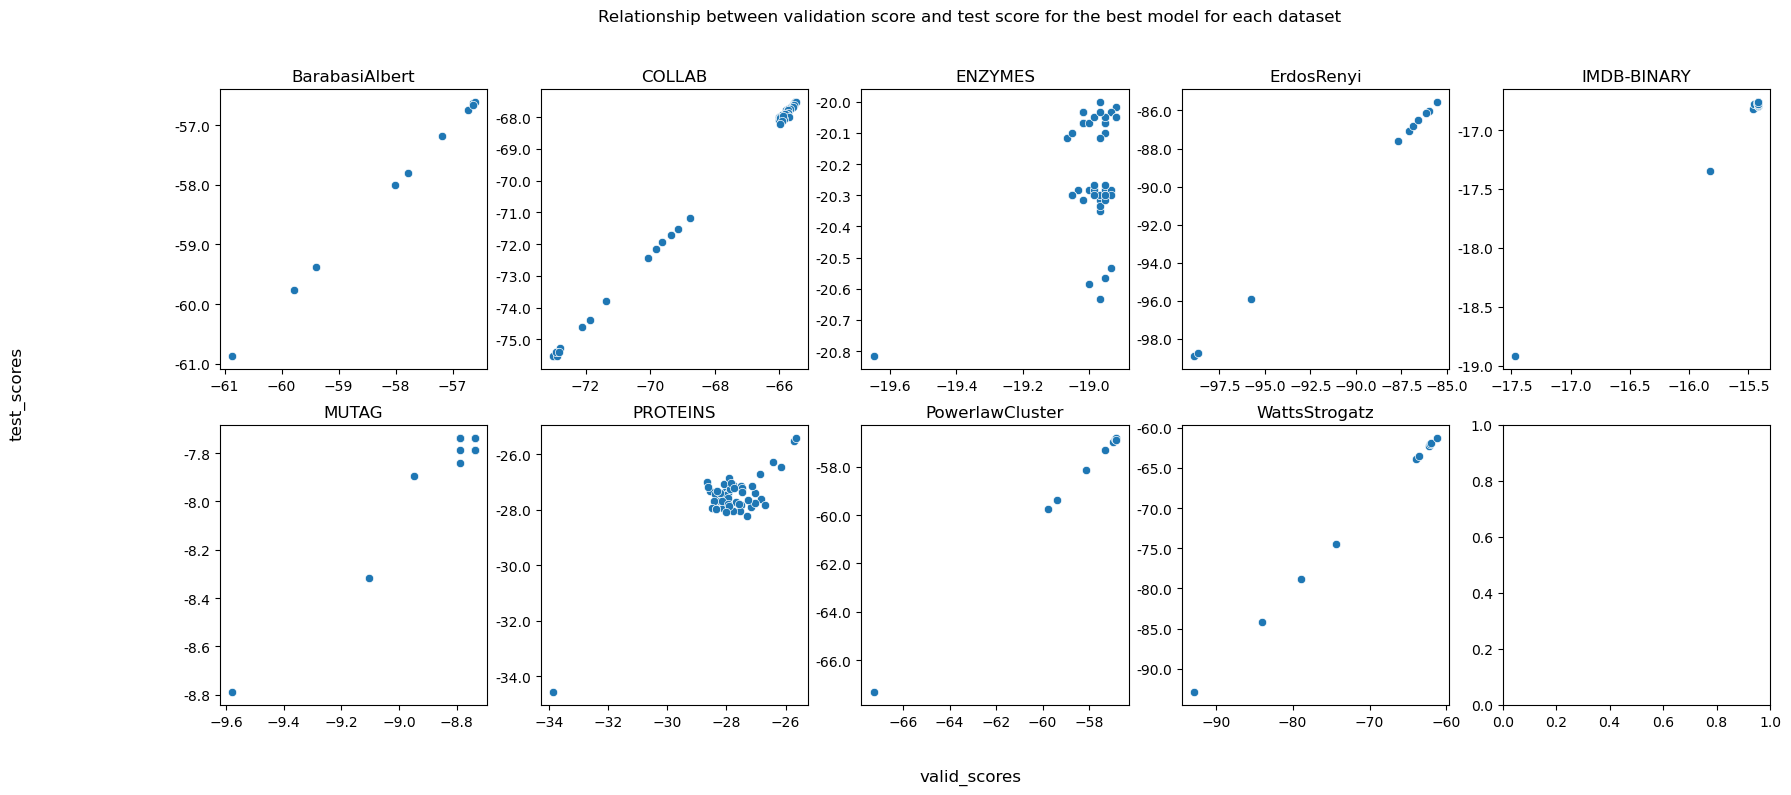

In [68]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
import seaborn as sns

for i, (j, row) in enumerate(bestdf.iterrows()):
    #print(i)
    ax = axs[i//5, i%5]
    sns.scatterplot( x=row.valid_scores, y=row.test_scores, ax = ax)
    ax.set_title(row.dataset)

    ylabels = ['{:,.1f}'.format(x) for x in ax.get_yticks()]
    ax.set_yticklabels(ylabels)
fig.supxlabel('valid_scores')
fig.supylabel('test_scores')
fig.suptitle('Relationship between validation score and test score for the best model for each dataset')

In [47]:
ax

<Axes: >